In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Loan_Default.csv')
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
# Visualisation de la taille du dataset
data.shape

(148670, 34)

In [4]:
# Création d'une copie du dataframe
df = data.copy()

La variable target est Status

<AxesSubplot:>

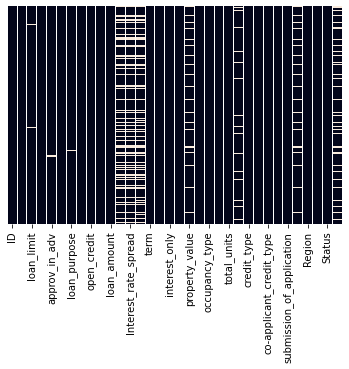

In [5]:
# Visualistion des valeurs manquantes
sns.heatmap(df.isnull() , yticklabels=False , cbar = False)

In [6]:
(df.isna().sum() / df.shape[0]).sort_values()

ID                           0.000000
Security_Type                0.000000
Region                       0.000000
co-applicant_credit_type     0.000000
Credit_Score                 0.000000
credit_type                  0.000000
total_units                  0.000000
Secured_by                   0.000000
occupancy_type               0.000000
construction_type            0.000000
lump_sum_payment             0.000000
Status                       0.000000
interest_only                0.000000
Credit_Worthiness            0.000000
year                         0.000000
loan_amount                  0.000000
business_or_commercial       0.000000
open_credit                  0.000000
loan_type                    0.000000
Gender                       0.000000
term                         0.000276
Neg_ammortization            0.000814
loan_purpose                 0.000901
age                          0.001345
submission_of_application    0.001345
approv_in_adv                0.006107
loan_limit  

In [7]:
df.dtypes.value_counts()

object     21
float64     8
int64       5
dtype: int64

On sépare les variables catégoriques des varaibles numériques

In [8]:
# Les variables catégoriques
var_cat = []

for col in df.select_dtypes('object'):
    var_cat.append(col)

In [9]:
# Les variables numériques

var_num  = []

for col in df.select_dtypes('float'):
    var_num.append(col)
    
for col in df.select_dtypes('int'):
    var_num.append(col)
    
len(var_num)

13

In [10]:
# On remplace les valeurs manquantes des variables catégoriques par les valeurs les plus fréquentes

for element in var_cat:
    df[element] = df[element].fillna(df[element].mode()[0])

In [11]:
# On remplace les valeurs manquantes des variables numériques par les valeurs médianes de ces colonnes

for element in var_num:
    df[element] = df[element].fillna(df[element].median())

In [12]:
(df.isna().sum() / df.shape[0]).sort_values()

ID                           0.0
Security_Type                0.0
Region                       0.0
LTV                          0.0
submission_of_application    0.0
age                          0.0
co-applicant_credit_type     0.0
Credit_Score                 0.0
credit_type                  0.0
income                       0.0
total_units                  0.0
Secured_by                   0.0
occupancy_type               0.0
construction_type            0.0
property_value               0.0
lump_sum_payment             0.0
interest_only                0.0
Neg_ammortization            0.0
year                         0.0
loan_limit                   0.0
Gender                       0.0
approv_in_adv                0.0
loan_type                    0.0
loan_purpose                 0.0
Status                       0.0
Credit_Worthiness            0.0
business_or_commercial       0.0
loan_amount                  0.0
rate_of_interest             0.0
Interest_rate_spread         0.0
Upfront_ch

Il n'y a plus aucune valeur manquante dans notre dataset

<AxesSubplot:>

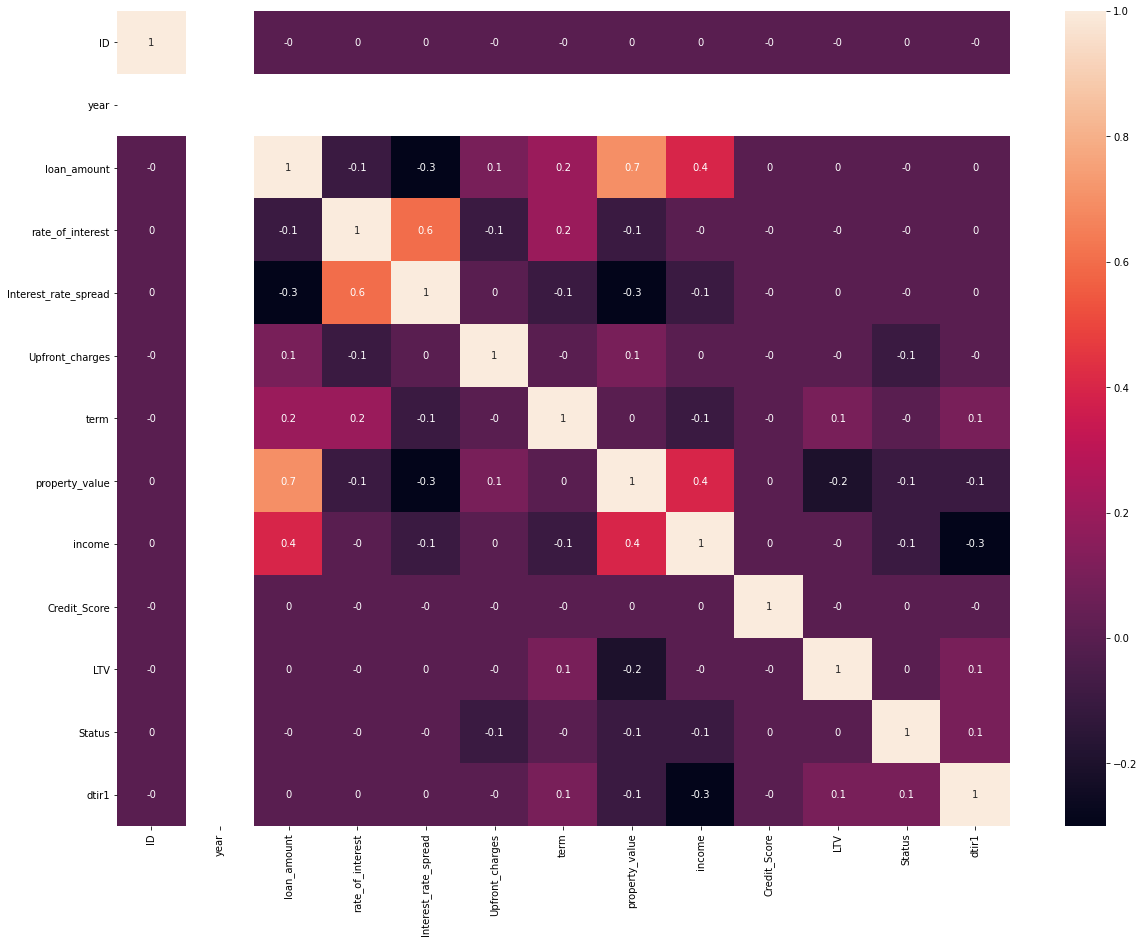

In [13]:
# Matrice de corrélation pour étudier la corrélation entre les variables

plt.figure(figsize=(20,15))
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr , annot=True)

Les variables les plus corrélés avec notre variable target sont : 

- income
- property_value
- Upfront_charges

# Analyse Univarié

In [14]:
df['Status'].value_counts(normalize=True)*100

# Il y'a un gros déséquilbre des classes , il faudra sur-échantilloner ou sous-échantilloner lors de la réalisation du modéle

0    75.355485
1    24.644515
Name: Status, dtype: float64

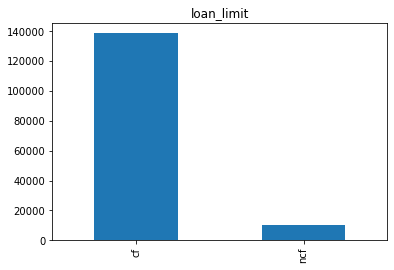

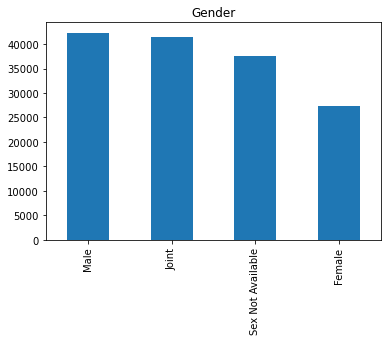

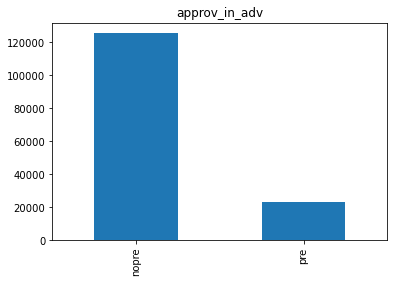

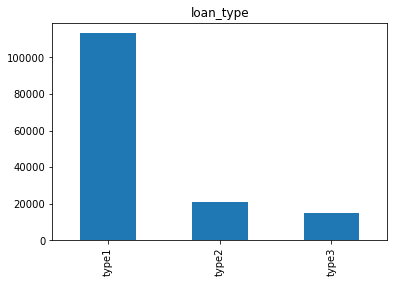

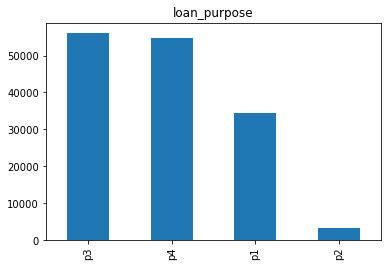

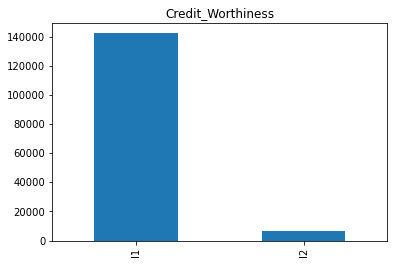

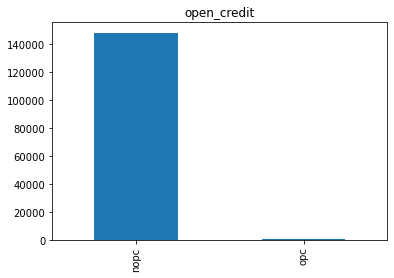

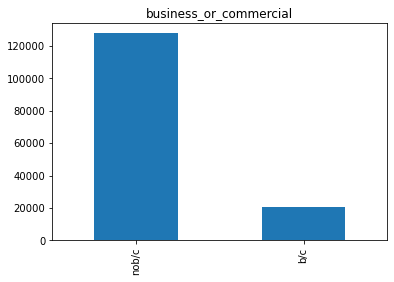

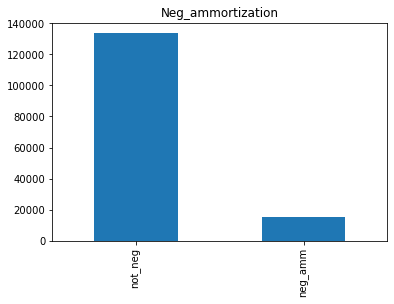

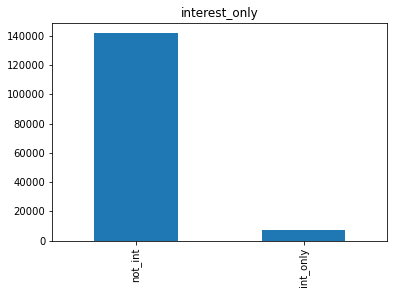

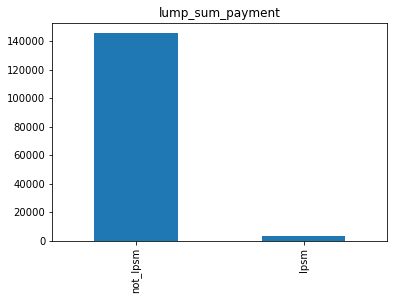

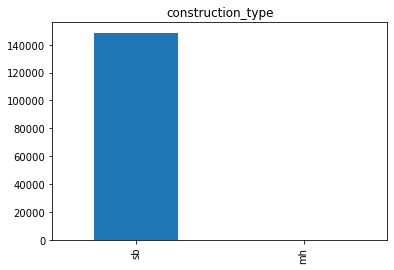

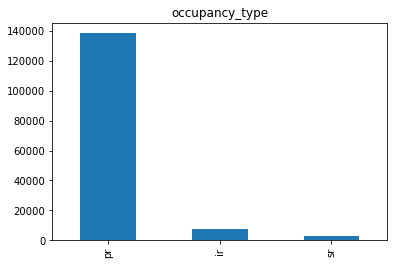

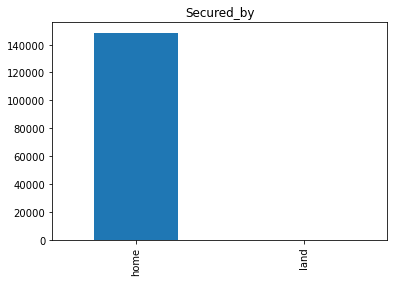

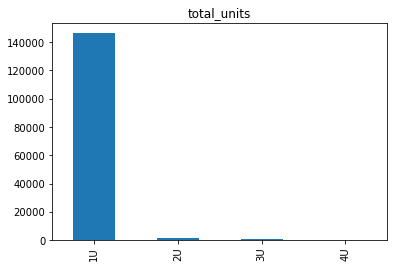

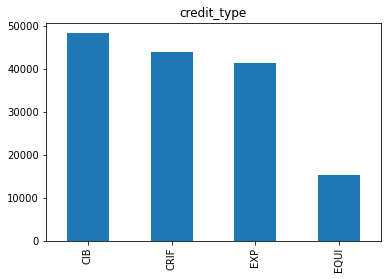

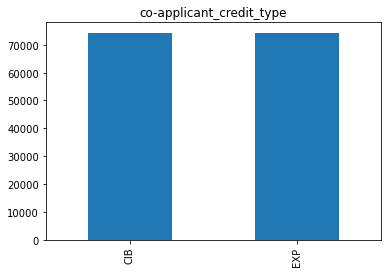

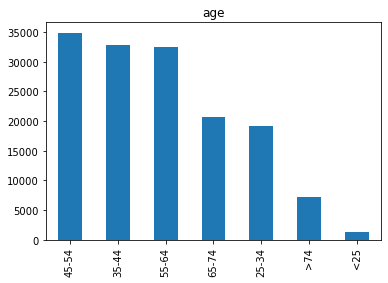

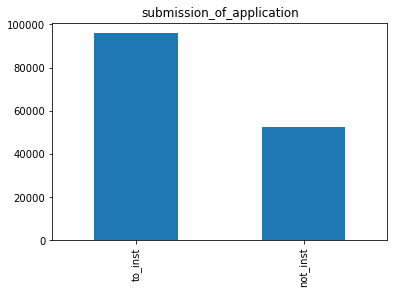

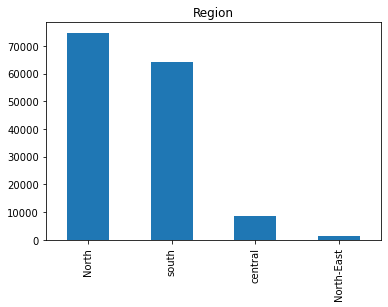

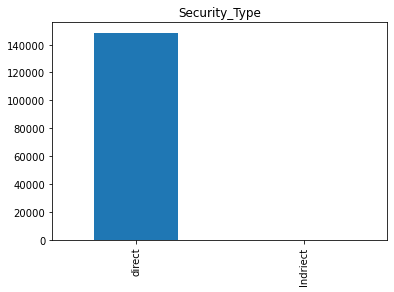

In [15]:
# Visualisation de toute les variables catégoriques

for col in var_cat:
    plt.figure()
    df[col].value_counts().plot.bar()
    plt.title(col)

In [16]:
# Dans ce dataset 0 veut dire que le crédit est accordé et 1 qu'il n'est pas été accordé

accorde_df = df[df['Status'] == 0] 
non_accorde_df = df[df['Status'] == 1] 

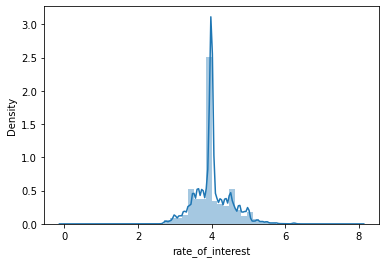

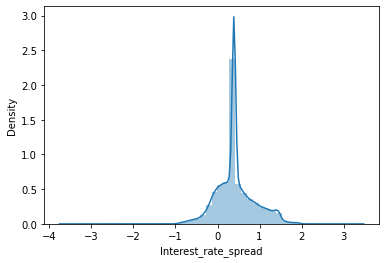

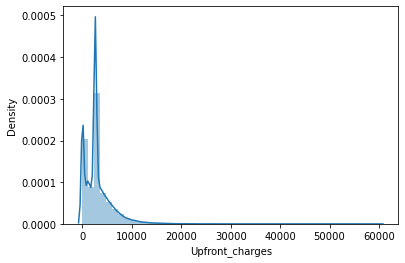

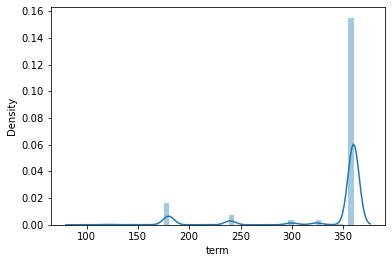

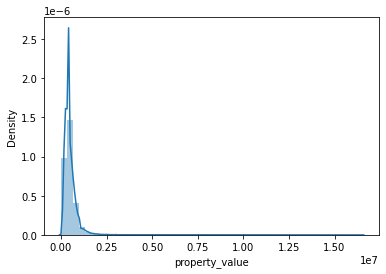

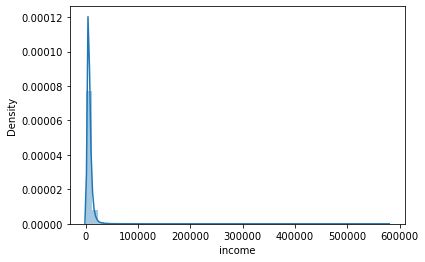

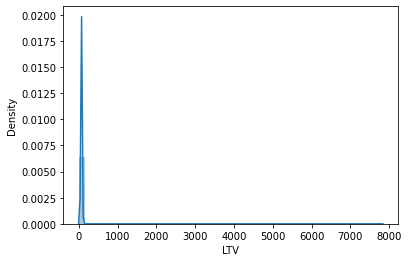

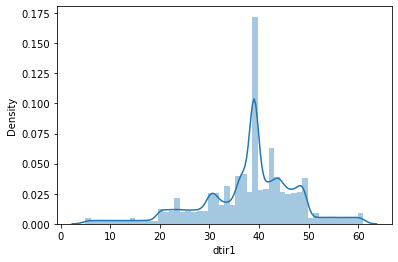

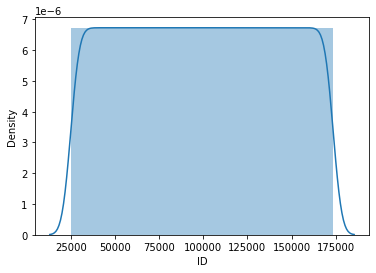

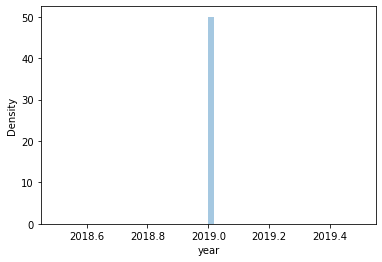

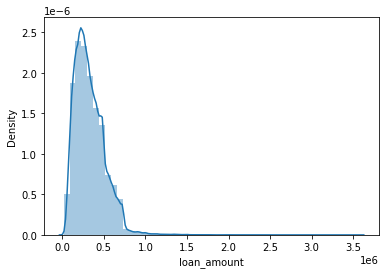

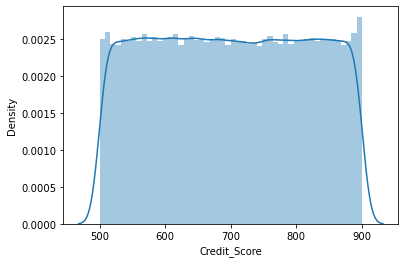

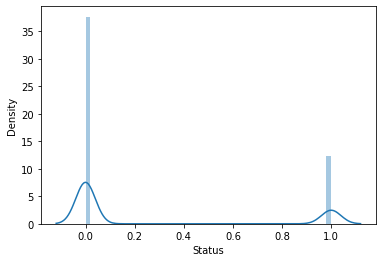

In [17]:
for col in var_num:
    plt.figure()
    sns.distplot(df[col])

# Analyse Bivarié

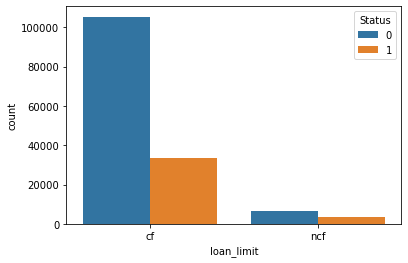

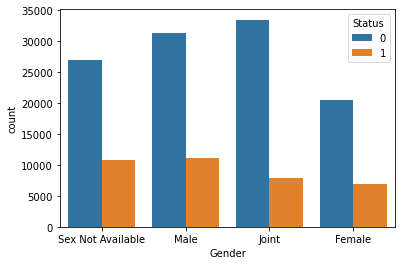

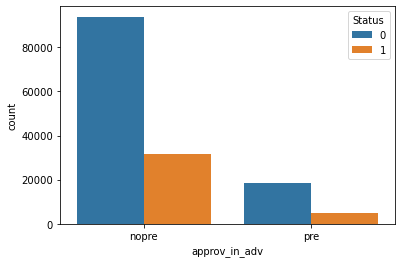

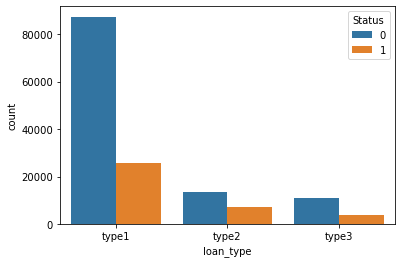

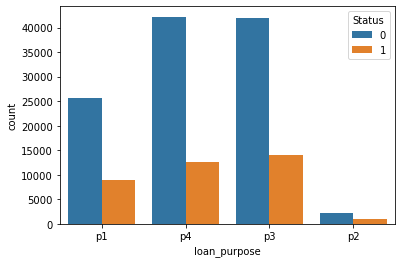

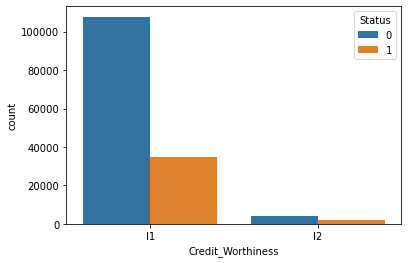

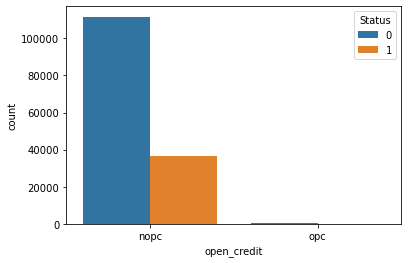

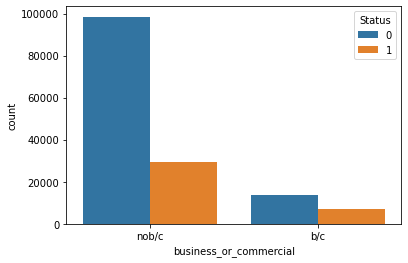

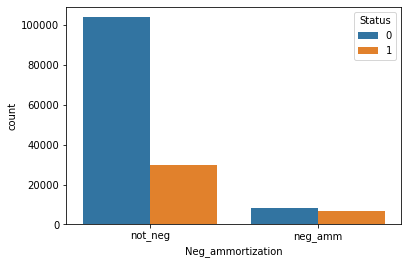

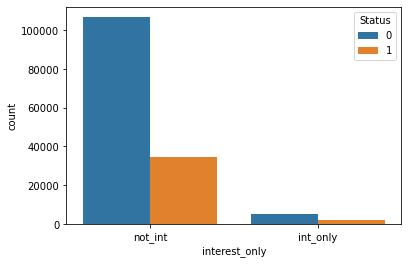

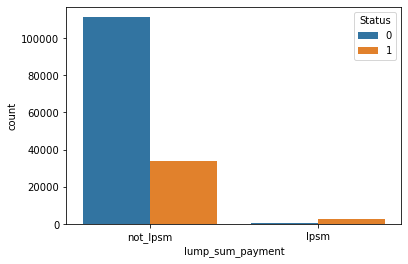

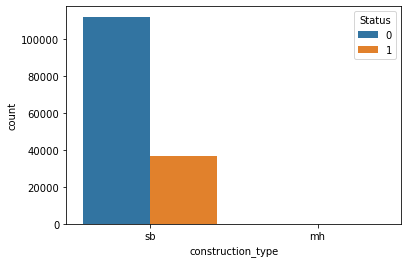

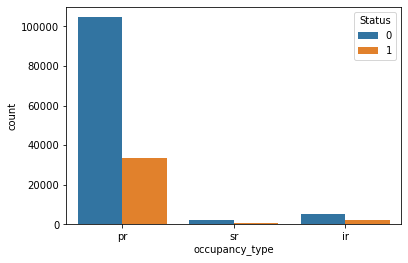

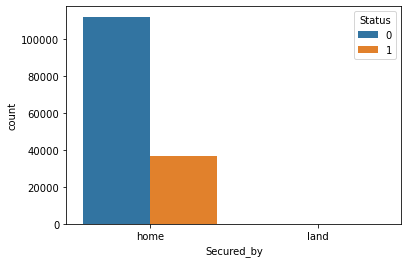

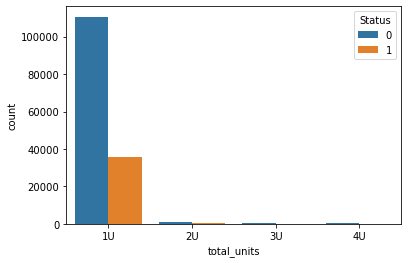

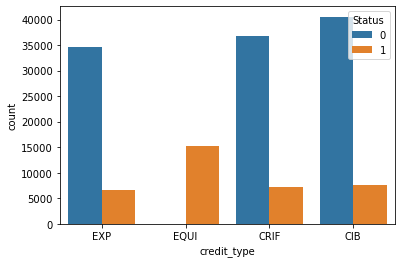

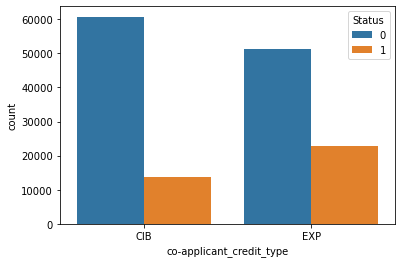

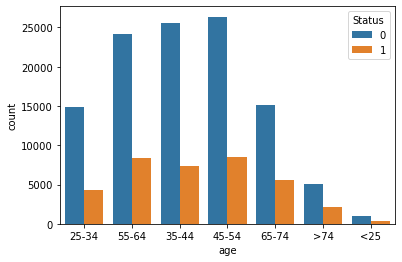

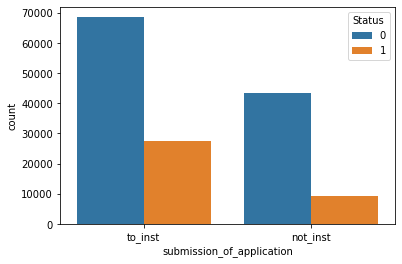

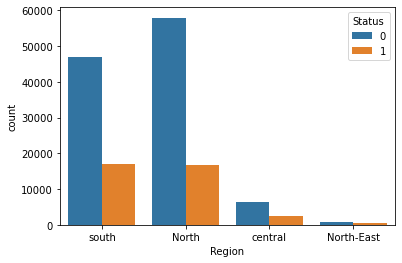

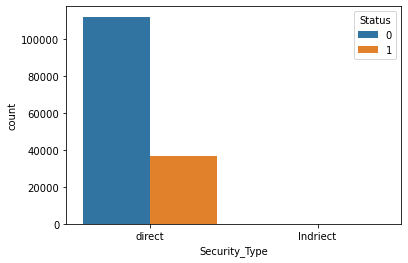

In [18]:
# Visualisation des relations entre les variables catégoriques et la target

for col in var_cat:
    plt.figure()
    sns.countplot(x=col , data=df , hue='Status')

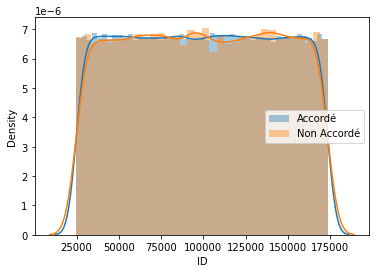

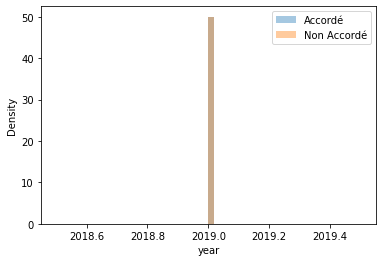

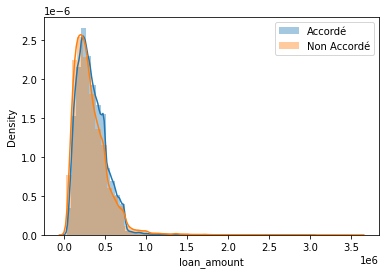

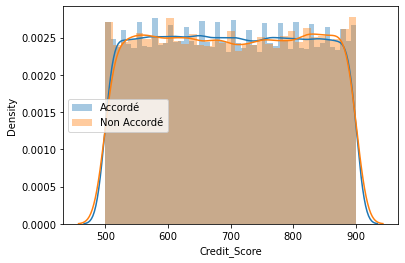

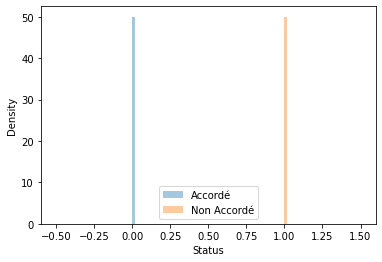

In [19]:
# Visualisation des relations entre les variables continue et la target

for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(accorde_df[col] , label='Accordé')
    sns.distplot(non_accorde_df[col] , label = 'Non Accordé')
    plt.legend()

In [20]:
test = df.groupby(['credit_type'])['Status'].value_counts()
test

credit_type  Status
CIB          0         40542
             1          7610
CRIF         0         36774
             1          7127
EQUI         1         15297
             0             1
EXP          0         34714
             1          6605
Name: Status, dtype: int64

# Encodage

In [21]:
df_cat = df[var_cat]
df_cat

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,EXP,55-64,to_inst,south,direct
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,ir,home,4U,CIB,CIB,25-34,not_inst,south,direct
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,EXP,45-54,not_inst,North,direct
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,EXP,55-64,to_inst,North,direct


In [22]:
df_cat = pd.get_dummies(df_cat , drop_first=True)
df_cat

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
3,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
148666,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
148667,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
148668,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1


In [23]:
df_num = df[var_num]
df_num

,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1,ID,year,loan_amount,Credit_Score,Status
0,3.990,0.3904,2596.45,360.0,118000.0,1740.0,98.728814,45.0,24890,2019,116500,758,1
1,3.990,0.3904,2596.45,360.0,418000.0,4980.0,75.135870,39.0,24891,2019,206500,552,1
2,4.560,0.2000,595.00,360.0,508000.0,9480.0,80.019685,46.0,24892,2019,406500,834,0
3,4.250,0.6810,2596.45,360.0,658000.0,11880.0,69.376900,42.0,24893,2019,456500,587,0
4,4.000,0.3042,0.00,360.0,758000.0,10440.0,91.886544,39.0,24894,2019,696500,602,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,3.125,0.2571,9960.00,180.0,608000.0,7860.0,71.792763,48.0,173555,2019,436500,659,0
148666,5.190,0.8544,0.00,360.0,788000.0,7140.0,74.428934,15.0,173556,2019,586500,569,0
148667,3.125,0.0816,1226.64,180.0,728000.0,6900.0,61.332418,49.0,173557,2019,446500,702,0
148668,3.500,0.5824,4323.33,180.0,278000.0,7140.0,70.683453,29.0,173558,2019,196500,737,0


In [24]:
# Concaténer les deux dataframe
df_encoded = pd.concat([df_cat , df_num] , axis=1)
df_encoded

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1,ID,year,loan_amount,Credit_Score,Status
0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,3.990,0.3904,2596.45,360.0,118000.0,1740.0,98.728814,45.0,24890,2019,116500,758,1
1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,3.990,0.3904,2596.45,360.0,418000.0,4980.0,75.135870,39.0,24891,2019,206500,552,1
2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,4.560,0.2000,595.00,360.0,508000.0,9480.0,80.019685,46.0,24892,2019,406500,834,0
3,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,4.250,0.6810,2596.45,360.0,658000.0,11880.0,69.376900,42.0,24893,2019,456500,587,0
4,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4.000,0.3042,0.00,360.0,758000.0,10440.0,91.886544,39.0,24894,2019,696500,602,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,3.125,0.2571,9960.00,180.0,608000.0,7860.0,71.792763,48.0,173555,2019,436500,659,0
148666,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5.190,0.8544,0.00,360.0,788000.0,7140.0,74.428934,15.0,173556,2019,586500,569,0
148667,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3.125,0.0816,1226.64,180.0,728000.0,6900.0,61.332418,49.0,173557,2019,446500,702,0
148668,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,3.500,0.5824,4323.33,180.0,278000.0,7140.0,70.683453,29.0,173558,2019,196500,737,0


In [25]:
X = df_encoded.drop(['Status'],axis=1)
y = df_encoded['Status']

# Modélisation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [46]:
X_train.reset_index(drop=True , inplace=True)
y_train.reset_index(drop=True , inplace=True)

In [64]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True)

train_df = X_train.copy()
train_df["label"] = y_train
train_df["kfold"] = 0

for i , (train_index , test_index) in enumerate (skf.split(X_train,y_train)):
    train_df.loc[test_index , "kfold"] = i 
    

rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)

In [77]:
model = make_pipeline(StandardScaler(),RandomForestClassifier())
scores = []
for i in range(5):
    model.fit(train_df[train_df['kfold'] != i].drop(['kfold','label'],axis=1) , train_df[train_df['kfold'] != i]['label'])
    score = model.predict(train_df[train_df['kfold'] == i].drop(['kfold','label'],axis=1))
    
    scores.append(f1_score(score,train_df[train_df['kfold'] == i]['label']))
    
print(scores)
print(np.mean(scores))

[0.999914915340764, 1.0, 1.0, 1.0, 1.0]
0.9999829830681527


In [84]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
feature = model1.feature_importances_

In [87]:
feature_name = model1.feature_names_in_
liste = []

for feat , name in zip(feature,feature_name):
    liste.append([feat , name])

liste = np.array(liste)
np.sort(liste , axis=0)

array([['0.0', 'Credit_Score'],
       ['0.00011643320339108761', 'Credit_Worthiness_l2'],
       ['0.00013150668707932826', 'Gender_Joint'],
       ['0.0001344455091920533', 'Gender_Male'],
       ['0.00015399197887080692', 'Gender_Sex Not Available'],
       ['0.00021178842575826233', 'ID'],
       ['0.0002121308091135131', 'Interest_rate_spread'],
       ['0.0002183707049830691', 'LTV'],
       ['0.00022293052647359905', 'Neg_ammortization_not_neg'],
       ['0.00026337355432995115', 'Region_North-East'],
       ['0.00038251241669906225', 'Region_central'],
       ['0.00044352986722414884', 'Region_south'],
       ['0.00047035358028035124', 'Secured_by_land'],
       ['0.0005676706416545734', 'Security_Type_direct'],
       ['0.0006740734749816904', 'Upfront_charges'],
       ['0.0007467468998599072', 'age_35-44'],
       ['0.0008396245422133509', 'age_45-54'],
       ['0.0009172253489281937', 'age_55-64'],
       ['0.0009957463186838266', 'age_65-74'],
       ['0.001230525882027558

In [76]:
model = make_pipeline(StandardScaler(),DecisionTreeClassifier())
model.fit(X_train , y_train)
model.score(X_test,y_test)

1.0

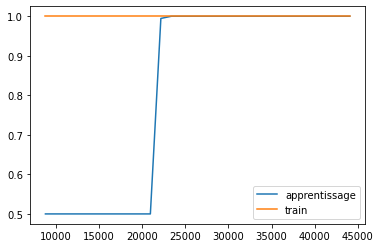

In [69]:
from sklearn.model_selection import learning_curve

N , train_score , val_score = learning_curve(model , X_ru , y_ru , train_sizes=np.linspace(0.2,1.0,30) , cv=4)

plt.plot(N , val_score.mean(axis=1) , label = 'apprentissage')
plt.plot(N , train_score.mean(axis=1) , label = 'train')
plt.legend()

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_ru,y_ru,cv=3).mean()

0.9999489405157007

In [72]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)


In [73]:
f1_score(y_test, y_pred, average=None)

array([0.9999555 , 0.99986232])

In [74]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([1.        , 0.99972467])

In [75]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.999911, 1.      ])

In [48]:
X_train

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1,ID,year,loan_amount,Credit_Score
0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,4.500,1.1754,6429.69,288.0,328000.0,12120.0,75.152439,30.0,28299,2019,246500,772
1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,4.990,1.4173,2431.25,360.0,238000.0,6480.0,78.361345,41.0,119275,2019,186500,652
2,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,4.000,-0.1966,389.22,360.0,1158000.0,9000.0,50.647668,45.0,138936,2019,586500,762
3,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,3.750,1.1524,3267.10,108.0,138000.0,10080.0,62.681159,19.0,127105,2019,86500,859
4,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,3.990,0.3904,2596.45,360.0,368000.0,5400.0,88.722826,39.0,138091,2019,326500,661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118931,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,4.500,0.4157,4173.13,360.0,1558000.0,12000.0,49.839538,38.0,112211,2019,776500,780
118932,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,4.500,0.7166,200.00,360.0,318000.0,7380.0,90.094340,37.0,66185,2019,286500,530
118933,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,3.375,0.0236,0.00,360.0,548000.0,7800.0,83.302920,43.0,29604,2019,456500,601
118934,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,4.990,1.0202,1738.44,360.0,308000.0,5400.0,34.577922,25.0,66077,2019,106500,660


In [49]:
y_train

0         0
1         0
2         0
3         0
4         1
         ..
118931    0
118932    0
118933    0
118934    0
118935    1
Name: Status, Length: 118936, dtype: int64

In [55]:
train_df.columns

Index(['loan_limit_ncf', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_pre', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l2', 'open_credit_opc',
       'business_or_commercial_nob/c', 'Neg_ammortization_not_neg',
       'interest_only_not_int', 'lump_sum_payment_not_lpsm',
       'construction_type_sb', 'occupancy_type_pr', 'occupancy_type_sr',
       'Secured_by_land', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_<25', 'age_>74', 'submission_of_application_to_inst',
       'Region_North-East', 'Region_central', 'Region_south',
       'Security_Type_direct', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1',
       'ID', 'ye